# **Visualising PCA & t-SNE in Python**

Import all modules & fashion training data. Also define a list of colours for plotting the cluster graphs later.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#Import machine learning modules
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_im_subset = train_images[0:20000]
train_lab_subset = train_labels[0:20000]

train_im_subset = train_im_subset.reshape(20000, 784, ) #to match the tutorial because idk what I'm doing

Reduce 784 dimensional dataset to four dimensions using PCA. Notice the two principal components cumulatively account for 47 percent of all the variance of the data.

In [3]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(train_im_subset)

In [4]:
pca_component_one = pca_result[:,0]
pca_component_two = pca_result[:,1]
pca_component_three = pca_result[:,2]
pca_component_four = pca_result[:,3]

pca.explained_variance_ratio_ #So we can use these to find principal components? Easy to reduce to 2D? YES!

array([0.29021329, 0.1778743 , 0.06015076, 0.04975864])

Despite being able to see some clear clusters forming, we can do better than this!

In [9]:
def plot_colour_chart(x_axis, y_axis):
    #make the chart
    fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(1, 1, 1)
    
    #vanish the axes
    ax.spines['left'].set_color('none') 
    ax.spines['bottom'].set_color('none') 
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')   
    
    #colour list
    colours = ['red', 'black', 'blue', 'purple', 'pink', 'green', 'orange', 'yellow', 'silver', 'brown']
    
    #scatterplot the given data
    plt.scatter(x_axis, y_axis, color = [colours[i] for i in train_lab_subset])
    
    return None

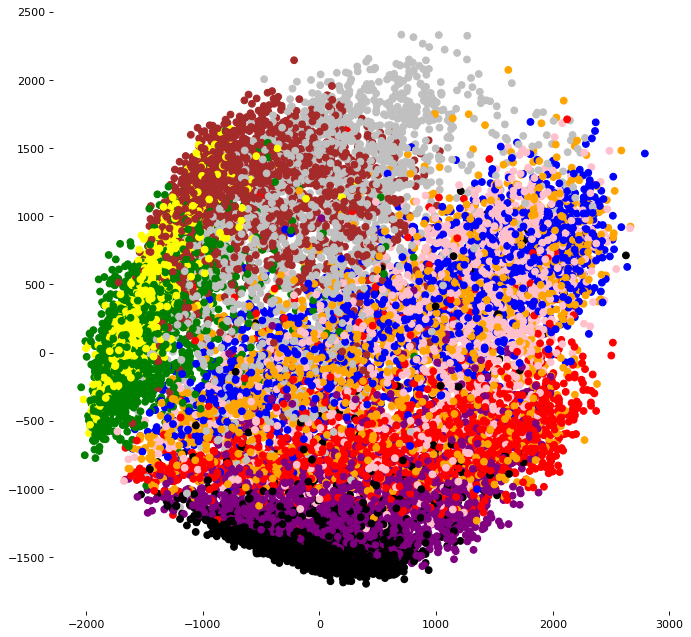

In [10]:
plot_colour_chart(pca_component_one, pca_component_two)

Let's use another dimensionality reduction technique: t-SNE. This takes approximately 19 minutes to run!

In [7]:
fashion_tsne = TSNE(random_state=123).fit_transform(train_im_subset)

This is a vast improvment, even if some of the blue, orange and red are still a bit mixed together.

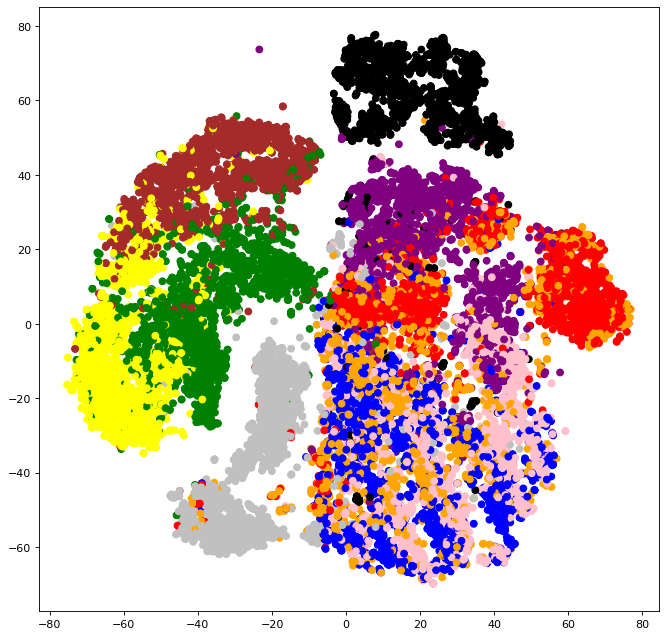

In [13]:
colours = ['red', 'black', 'blue', 'purple', 'pink', 'green', 'orange', 'yellow', 'silver', 'brown']

fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(fashion_tsne[:,0], fashion_tsne[:,1], color = [colours[i] for i in train_lab_subset])

By using PCA on the data, and then using t-SNE on that data, we obtain a similar looking chart. Why is this? Could this be because we have reduced to dimension 50 using the PCA?

In [14]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(train_im_subset)

In [15]:
pca_tsne_combo = TSNE(random_state=123).fit_transform(pca_result_50)

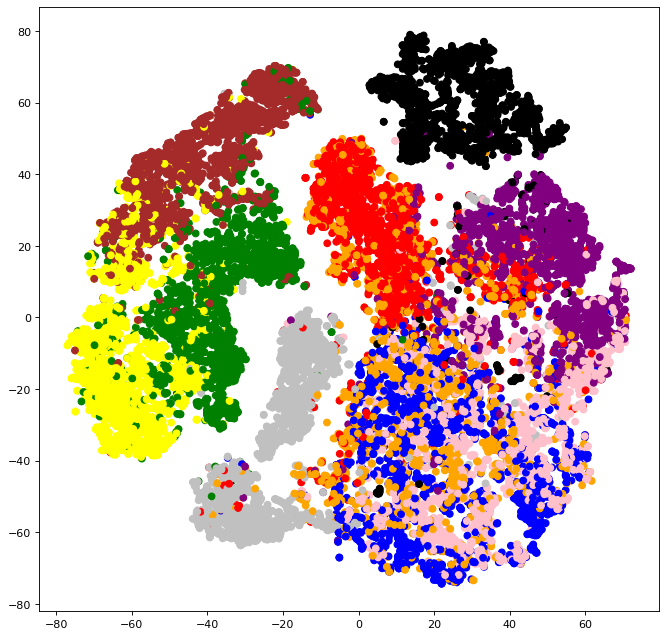

In [16]:
colours = ['red', 'black', 'blue', 'purple', 'pink', 'green', 'orange', 'yellow', 'silver', 'brown']

fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(pca_tsne_combo[:,0], pca_tsne_combo[:,1], color = [colours[i] for i in train_lab_subset])